You can find a textual explanation of all the data I've extracted during the Exploratory Data Analysis (EDA) at the following URL: actum.it/notebook.

In [ ]:
# pip install transformers
# pip install torch
# pip install wordcloud
# pip install nltk

In [6]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

In [7]:
import pandas as pd

csv_file_path = 'data/t1p1-dataframe_after_eda.csv'

def process_csv(csv_path):
    print(f"\nExtraction {csv_path}")
    df_aq = pd.read_csv(csv_path, delimiter='}', engine='python')
    # Drop the "Unnamed: 0" column if it exists, and ignore errors if it doesn't
    df_aq.drop(columns=["Unnamed: 24"], inplace=True, errors='ignore')
    # Return the modified DataFrame
    return df_aq

df = process_csv(csv_file_path)

#df.head()


Extraction data/dataframe_after_eda.csv


# Text Sentiment Analisis

In [49]:
# inference model simplified
#classifier = pipeline("sentiment-analysis")


# inference model extended
#model_name = "distilbert-base-uncased-finetuned-sst-2-english"
# 
#model = AutoModelForSequenceClassification.from_pretrained(model_name)
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#
#classifier = pipeline("sentiment-analysis", model=model_name, tokenizer=tokenizer)


# Model that has NEG (negative), NEU (neutral) and POS (positive)
classifier = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis")


def split_strings(paragraph, max_words=30):
    new_strings = []
    for sentence in paragraph:
        # Split the sentence into words
        words = sentence.split()  

        # the model ha a limited input size
        # I need to split long sentences.

        # If it has 40 or fewer words, keep it as is else 
        if len(words) <= max_words:
            new_strings.append(sentence)  
        else:
            #print('WORDS EXCEDED INPUT')
            while len(words) > max_words:
                # Take the first 40 words
                new_string = ' '.join(words[:max_words])  
                # Append it to the new list
                new_strings.append(new_string)  
                # Remove the processed words
                words = words[max_words:]  
            if words:
                # Append any remaining words
                new_strings.append(' '.join(words))  
    return new_strings



# initializing total wods foreach type
total_NEG_words = 0
total_NEU_words = 0
total_POS_words = 0
# initializing total wods foreach type
string_NEG_concat = ""
string_NEU_concat = ""
string_POS_concat = ""
# initializing df new column Sentiment
df['sentiment'] = 'u'



for i, _ in enumerate(df.iterrows()):
    NEG_container = 0
    NEU_container = 0
    POS_container = 0

    # extracting values
    rating = df.at[i, 'rating']
    #title = df.at[i, 'title']
    item = df.at[i, 'body']

    # handling and preventing errors
    if not isinstance(item, str):
        item = ""
    phrases = item.split(". ")
    if not isinstance(phrases, list):
        phrases = ['empty']
    phrases = split_strings(phrases)
    for phrase in phrases:
        print(phrase)
        result = classifier(phrase)
        label = result[0]['label']
        #print(label)
        if label == 'NEG':
            NEG_container = NEG_container + 1
            string_NEG_concat = string_NEG_concat + phrase
        elif label == 'NEU':
            NEU_container = NEU_container + 1
            string_NEU_concat = string_NEU_concat + phrase
        elif label == 'POS':
            POS_container = POS_container + 1
            string_POS_concat = string_POS_concat + phrase

    # Create a dictionary to map variables to messages
    variable_messages = {
        NEG_container: "NEGATIVE",
        NEU_container: "NEUTRAL",
        POS_container: "POSITIVE",
    }
    # Find the variable with the highest value
    highest_variable = max(NEG_container, NEU_container, POS_container)
    # Print the corresponding message
    #print(f'{i} | {rating}-{variable_messages[highest_variable]}')
    df.at[i, 'sentiment'] = variable_messages[highest_variable]

    total_NEG_words = total_NEG_words + NEG_container
    total_NEU_words = total_NEU_words + NEU_container
    total_POS_words = total_POS_words + POS_container




# Execute Statistics over NLP
count_total_words = total_NEG_words + total_NEG_words + total_POS_words

NEG_percentage = total_NEG_words * 100 / count_total_words
NEU_percentage = total_NEU_words * 100 / count_total_words
POS_percentage = total_POS_words * 100 / count_total_words

sentiment_mean = (total_NEG_words * 1 + total_NEU_words * 2 + total_POS_words * 3) / count_total_words

print(f'Sentiment MEAN: {sentiment_mean}')
print(f'{total_NEG_words} (%{NEG_percentage})')
print(f'{total_NEU_words} (%{NEU_percentage})')
print(f'{total_POS_words} (%{POS_percentage})')


# NEGATIVE
#print(string_NEG_concat)
file_path = "data/NEG_text.txt"
with open(file_path, "a") as file:
    file.write(string_NEG_concat)


# NEUTRAL
#print(string_NEU_concat)
file_path = "data/NEU_text.txt"
with open(file_path, "a") as file:
    file.write(string_NEU_concat)

# POSITIVE
#print(string_POS_concat)
file_path = "data/POS_text.txt"
with open(file_path, "a") as file:
    file.write(string_POS_concat)



emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


TEXT EXCEDED
TEXT EXCEDED
Absolutely the worst experience ever
 Flew into Heathrow, no problem
Waited for 5 hours, three extra hours, for our connection to Porto then the cancelled the flight
Scrambled for a hotel and a new flight the next day
They routed us through Madrid the next morning
That flight was 1.5 hours late so we missed our connection to Porto
Because we missed the connection (their fault), they cancelled our return flights
After two hours on the phone with customer service from the Madrid airport, they booked us a new return flight, then they made is pay $ 1300 to fly from
Madrid to Porto
Then, for no reason they cancelled our return flight again! After hours, and hours and hours with customer service, we finally got a return flight five days after our original
return flight
Meanwhile, they lost my wife\'s luggage
We finally got 15 DAYS after they lost it
Return flight? More problems with our reservations
At no point was British Airways helpful
They left the onus on us to

In [ ]:
""" input_strings = ["Zuletzt ist auch unser Gep\xc3\xa4ck mit 3 Tagen Versp\xc3\xa4tung in Puerto Rico angekommen und wir mussten unseren Rundreise umplanen\xe2\x80\xa6 wir haben bis heute noch keine Info \xc3\xbcber unser Gep\xc3\xa4ck erhalten, zum Gl\xc3\xbcck haben wir selbst am Flughafen nachgesehen und es war da\xe2\x80\xa6 Beim letzten verpsp\xc3\xa4teten Flug meinte die Kabinen Crew dass auch sie ihre Anschlussfl\xc3\xbcge verpassen und wir im selben Flugzeug sitzen und sie k\xc3\xb6nnen nichts machen.", "Nun sitzen wir wieder in Miami am Flughafen und haben schon wieder eine massive Versp\xc3\xa4tung sodass wir unseren Anschlussflug verpassen werden"]

result = classifier(text)
label = result[0]['label']
print(label) 

def split_strings(strings, max_words=40):
    new_strings = []

    for string in strings:
        words = string.split()  # Split the string into words
        if len(words) <= max_words:
            new_strings.append(string)  # If it has 40 or fewer words, keep it as is
        else:
            while len(words) > max_words:
                new_string = ' '.join(words[:max_words])  # Take the first 40 words
                new_strings.append(new_string)  # Append it to the new list
                words = words[max_words:]  # Remove the processed words
            if words:
                new_strings.append(' '.join(words))  # Append any remaining words

    return new_strings

# Example usage:
#input_strings = ["This is a sample string with more than 40 words and it needs to be split into multiple strings with 40 words each.", "This is another short string."]

result_strings = split_strings(input_strings)
for idx, string in enumerate(result_strings):
    print(f"String {idx + 1} ({len(string.split())} words):")
    print(string)
    print()

print(result_strings) """


In [54]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [63]:
import nltk
nltk.data.path.append('stopwords/english')

[('flight', 1563), ('ba', 1177), ('service', 763), ('airways', 518), ('food', 516), ('british', 463), ('seat', 460), ('staff', 430), ('class', 420), ('get', 420), ('seats', 408), ('business', 403), ('one', 403), ('would', 386), ('even', 381), ('hours', 379), ('customer', 368), ('time', 363), ('airline', 355), ('crew', 345), ('cabin', 331), ('us', 330), ('could', 294), ('told', 281), ('passengers', 276), ('poor', 276), ('economy', 267), ('never', 254), ('delayed', 253), ('flights', 252), ('due', 251), ('back', 244), ('fly', 242), ('hour', 236), ('london', 229), ('like', 229), ('plane', 228), ('first', 224), ('check', 222), ('experience', 221), ('airport', 209), ('heathrow', 205), ('cancelled', 202), ('really', 190), ('pay', 190), ('2', 189), ('return', 184), ('got', 184), ('long', 183), ('boarding', 179)]


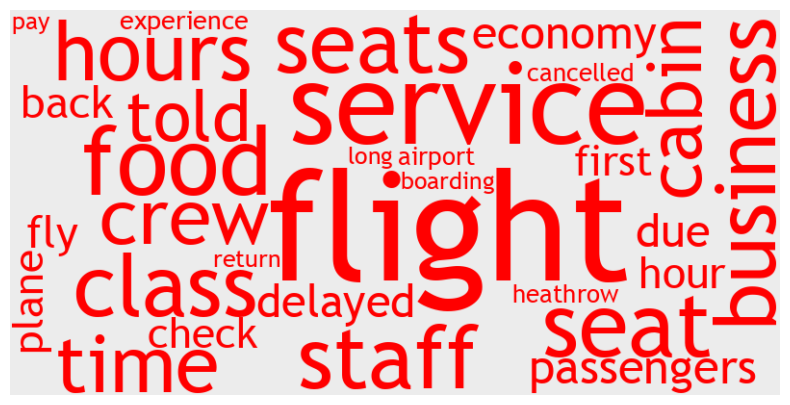

In [95]:
# Open the file in read mode
with open('data/NEG_text.txt', 'r') as file:
    # Read the contents of the file
    string_NEG_concat = file.read()

# Tokenize text (split into words)
words = nltk.word_tokenize(string_NEG_concat)

# Convert to lowercase and remove punctuation
words = [word.lower() for word in words if word.isalnum()]

# Remove stopwords (optional)
with open('stopwords/english', 'r') as stopwords_file:
    custom_stopwords = stopwords_file.read().splitlines()

# Remove custom stopwords from the list of words
words = [word for word in words if word not in custom_stopwords]


import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Count word frequencies
word_counts = Counter(words)

# Sort words by frequency and select the top 40
top_words = word_counts.most_common(50)
print(top_words)


# Remove unnecessary words based on the previous list of the top 50 most common words.
words_to_remove = ['ba', 'airways', 'british', 'get', 'one', 'would', 'even', 'customer', 'airline', 'us', 'could', 'poor','never', 'flights', 'london', 'like', 'really', '2', 'got']

new_list = []
for tuple in top_words:
    if tuple[0] not in words_to_remove:
        new_list.append(tuple)
    

# Create a WordCloud object with custom color mapping
def white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "red"

# Set the path to your custom TTF font file
custom_font_path = 'data/trebuchetMS.ttf'

# Create a WordCloud with a custom font
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#ececec',
    color_func=white_color_func,
    font_path=custom_font_path,
).generate_from_frequencies(dict(new_list))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('flight', 698), ('good', 576), ('crew', 467), ('ba', 385), ('service', 382), ('cabin', 307), ('food', 304), ('time', 260), ('staff', 218), ('friendly', 211), ('seat', 191), ('well', 180), ('comfortable', 177), ('great', 175), ('nice', 172), ('seats', 170), ('better', 166), ('class', 159), ('first', 157), ('airways', 149), ('lounge', 145), ('economy', 144), ('british', 143), ('really', 133), ('would', 131), ('one', 131), ('business', 130), ('new', 129), ('excellent', 128), ('experience', 127), ('flights', 119), ('us', 118), ('club', 114), ('made', 113), ('aircraft', 111), ('best', 107), ('meal', 105), ('much', 105), ('drinks', 104), ('boarding', 97), ('efficient', 93), ('get', 92), ('london', 92), ('professional', 92), ('board', 89), ('pleasant', 89), ('quite', 89), ('heathrow', 88), ('airline', 87), ('airlines', 84)]


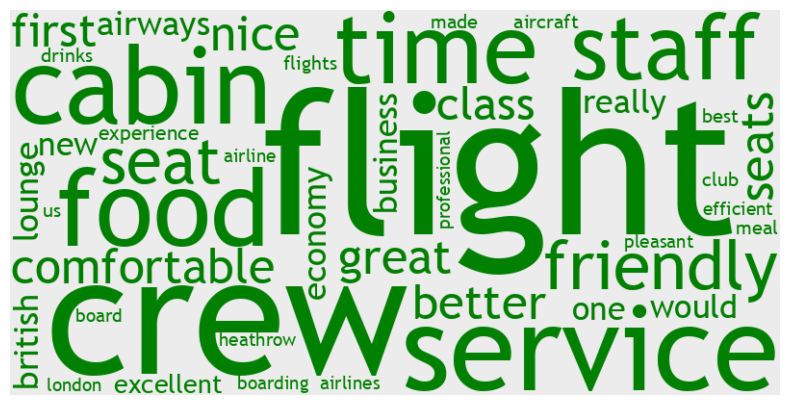

In [98]:
# Open the file in read mode
with open('data/POS_text.txt', 'r') as file:
    # Read the contents of the file
    string_POS_concat = file.read()

# Tokenize text (split into words)
words = nltk.word_tokenize(string_POS_concat)

# Convert to lowercase and remove punctuation
words = [word.lower() for word in words if word.isalnum()]

# Remove stopwords (optional)
with open('stopwords/english', 'r') as stopwords_file:
    custom_stopwords = stopwords_file.read().splitlines()

# Remove custom stopwords from the list of words
words = [word for word in words if word not in custom_stopwords]

# Count word frequencies
word_counts = Counter(words)

# Sort words by frequency and select the top 40
top_words = word_counts.most_common(50)
print(top_words)


# Remove unnecessary words based on the previous list of the top 50 most common words.
words_to_remove = ['ba','good', 'well', 'much', 'get', 'quite']

new_list = []
for tuple in top_words:
    if tuple[0] not in words_to_remove:
        new_list.append(tuple)
    

# Create a WordCloud object with custom color mapping
def white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "green"

# Set the path to your custom TTF font file
custom_font_path = 'data/trebuchetMS.ttf'

# Create a WordCloud with a custom font
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#ececec',
    color_func=white_color_func,
    font_path=custom_font_path,
).generate_from_frequencies(dict(new_list))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [99]:
# Export dataframe
df.to_csv('data/t1p2-dataframe_after_eda.csv', sep="}", index=False)

You can find a textual explanation of all the data I've extracted during the Exploratory Data Analysis (EDA) at the following URL: actum.it/notebook.